**ID - 202218061**

**NAME -  JATAN SAHU**

**LINEAR REGRESSION**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**1)	Implement Linear regression (2D linear regression) function. The function must take a train data and a test data as input (do it using sklearn). Normalize the feature in train and test data. Compute the weights using closed form solution, gradient descent algorithm (play with number of iterations and learning rate to obtain best prediction on test data) and statistical linear regression. Plot the regression line of all three methods on the same figure using matplotlib.** 

In [14]:
def linear_regression(X , Y , method  , learning_rate=0.001 , iteration =1000 ):
  #SPLITIING DATA 
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

  #NORMALIZING DATA 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
  X_test = scaler.transform(np.array(X_test).reshape(-1, 1))

  X_train_norm = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test_norm = np.c_[np.ones(X_test.shape[0]), X_test]

  if method =="closed_form":
        XT_X = np.dot(X_train_norm.T , X_train_norm)
        XT_y = np.dot(X_train_norm.T, y_train)
        weights = np.linalg.solve(XT_X, XT_y)
        y_pred = np.dot(X_test_norm, weights)

  elif method == 'gradient_descent':
    rows, cols = X_train_norm.shape
    weights = np.random.randn(cols, 1)
    for i in range(iteration):
        y_pred = np.dot(X_train_norm, weights)
        error = y_pred - np.array(y_train).reshape(-1, 1)
        gradient = (2 / rows) * np.dot(X_train_norm.T, error)
        weights = weights - learning_rate * gradient
    y_pred = np.dot(X_test_norm, weights)

  elif method == 'statistical':
        X_train_slr = X_train
        model_slr = LinearRegression()
        model_slr.fit(X_train_slr, y_train)
        y_pred = model_slr.predict(X_test)
  else:
    raise ValueError('Invalid method specified.')
    
    #R2 score:
    r2 = r2_score(y_test, y_pred)

    #Plot
    plt.scatter(X_test[:, 0], y_test, color='blue')
    plt.plot(X_test[:, 0], y_pred, color='red')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

    return y_pred, r2



In [28]:
def linear_regression(X,Y, method, learning_rate=0.01, n_iterations=1000):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
    X_test = scaler.transform(np.array(X_test).reshape(-1, 1))
    
    X_train_normalized = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test_normalized = np.c_[np.ones(X_test.shape[0]), X_test]
    
    if method == 'closed_form':
        XT_X = np.dot(X_train_normalized.T, X_train_normalized)
        XT_y = np.dot(X_train_normalized.T, y_train)
        weights = np.linalg.solve(XT_X, XT_y)
        y_pred = np.dot(X_test_normalized, weights)    

    elif method == 'gradient_descent':
        rows, cols = X_train_normalized.shape
        weights = np.random.randn(cols, 1)
        for i in range(n_iterations):
            y_pred = np.dot(X_train_normalized, weights)
            error = y_pred - np.array(y_train).reshape(-1, 1)
            gradient = (2 / rows) * np.dot(X_train_normalized.T, error)
            weights = weights - learning_rate * gradient
        y_pred = np.dot(X_test_normalized, weights)

    elif method == 'statistical':
        X_train_slr = X_train
        model_slr = LinearRegression()
        model_slr.fit(X_train_slr, y_train)
        y_pred = model_slr.predict(X_test)
    else:
        raise ValueError('Invalid method specified.')
    
    #R2 score:
    r2 = r2_score(y_test, y_pred)

    #Plot
    plt.scatter(X_test[:, 0], y_test, color='blue', label="actual" )
    plt.plot(X_test[:, 0], y_pred, color='green',label="predicted")
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

    return y_pred, r2


2)	Use the above function and predict sepalLength given sepalWidth in iris dataset (take train:test ratio of 0.8). Compute R2 score of each method on predictions (use sklearn)


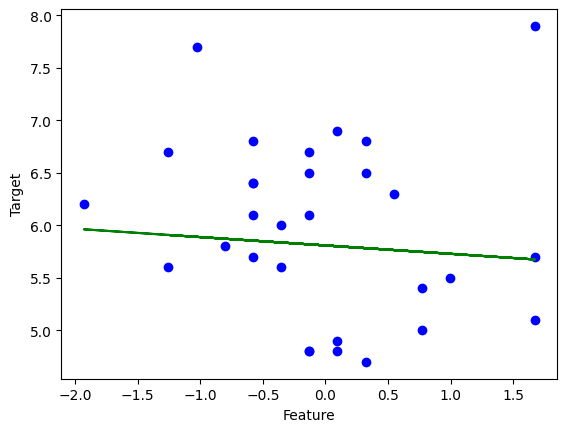

R2 score: -0.021


In [29]:
iris = pd.read_csv('/content/Iris.csv')

X = iris['SepalWidthCm']
Y = iris['SepalLengthCm']

y_pred, r2 = linear_regression(X,Y, method='closed_form')
print(f'R2 score: {r2:.3f}')

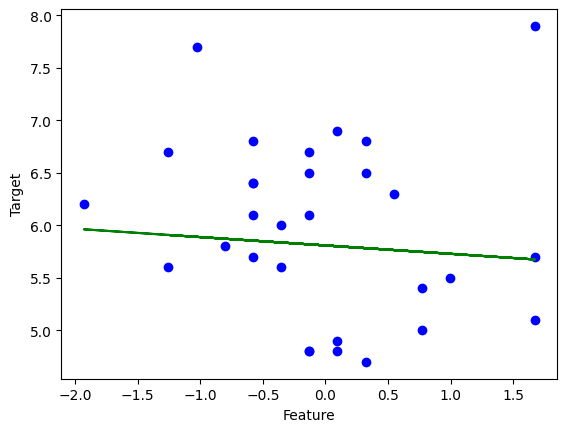

R2 score: -0.021


In [30]:
y_pred, r2 = linear_regression(X,Y, method='gradient_descent')
print(f'R2 score: {r2:.3f}')

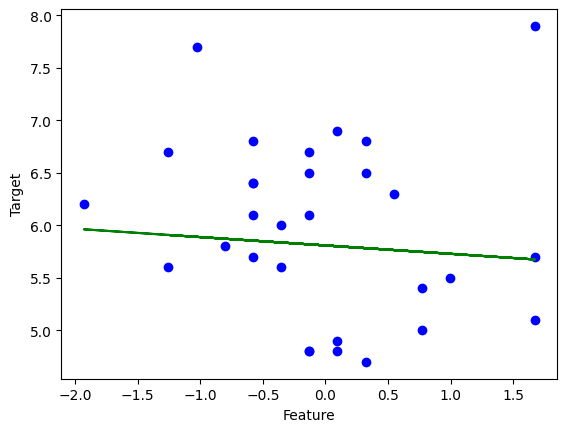

R2 score: -0.021


In [31]:
y_pred, r2 = linear_regression(X,Y, method='statistical')
print(f'R2 score: {r2:.3f}')

3)	Implement Multiple Linear regression function. The function must take a train data and a test data as input (do it using sklearn). Normalize the features in train and test data. Compute the weights using closed form solution, gradient descent algorithm (play with number of iterations and learning rate to obtain best prediction on test data)


In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def multiple_linear_regression(X,Y, method, n_iterations=1000, learning_rate=0.01):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    #Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(np.array(X_train))
    X_test_scaled = scaler.transform(np.array(X_test))
    
    X_train_scaled = np.c_[np.ones(X_train.shape[0]), X_train_scaled]
    X_test_scaled = np.c_[np.ones(X_test.shape[0]), X_test_scaled]
    
    if method == 'closed_form':
        XT_X = np.dot(X_train_scaled.T, X_train_scaled)
        XT_y = np.dot(X_train_scaled.T, y_train)
        weights = np.linalg.solve(XT_X, XT_y)
        y_pred = np.dot(X_test_scaled, weights)    

    elif method == 'gradient_descent':
        rows, cols = X_train_scaled.shape
        weights = np.random.randn(cols, 1)
        for i in range(n_iterations):
            y_pred = np.dot(X_train_scaled, weights)
            error = y_pred - np.array(y_train).reshape(-1, 1)
            gradient = (2 / rows) * np.dot(X_train_scaled.T, error)
            weights = weights - learning_rate * gradient
        y_pred = np.dot(X_test_scaled, weights)

    else:
        raise ValueError('Invalid method specified.')
    
    #R2 score:
    r2 = r2_score(y_test, y_pred)   
    
    return y_pred, r2

4)	Use the above function and predict sepalLength given sepalWidth, petalLength and petalWidth in iris dataset (take train:test ratio of 0.8). Compute R2 score of each method on predictions (use sklearn)

In [33]:
X = iris[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = iris['SepalLengthCm']

y_pred, r2 = multiple_linear_regression(X,Y, method='closed_form')
print("R2 score (closed form):", r2)

y_pred, r2 = multiple_linear_regression(X,Y, method='gradient_descent')
print("R2 score (gradient descent):", r2)


R2 score (closed form): 0.8519067571325745
R2 score (gradient descent): 0.8363284094651612
